** **COMP1800 DATA VISUALISATION** **

#Loading the Datasets and Primary Exploration





In [1]:
#Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)

pd.plotting.register_matplotlib_converters()

cinema_age = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaAge.csv', index_col=0) # Avg Age of visitors
cinema_capacity = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaCapacity.csv', index_col=0) # Avg Seating capacity
cinema_marketing = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaMarketing.csv', index_col=0) # Avg Spend on Marketing
cinema_overheads = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaOverheads.csv', index_col=0) # Avg Overheads for each cinema
cinema_spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaSpend.csv ', index_col=0) # Avg Spend(£)by visitors


In [38]:
!pip install hvplot
import holoviews as hv
import hvplot.pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.9 MB/s eta 0:00:00


In [3]:
print(data.head())
print(data.tail())
print(data.describe())
print(data.sum())

            CCX  SJE  WVA   VPG  YCI  AKA   YBS  UDD  XWO  ZQL  ...  SDT  BKK  \
Date                                                            ...             
2019-01-01    0  331  863   880  124    0   915  353  188  146  ...    0    0   
2019-01-08    0  323  797  1036  147    0  1004  358  176  116  ...    0    0   
2019-01-15    0  332  803  1088  120    0  1073  355  175  110  ...    0    0   
2019-01-22    0  321  925  1040  108    0   885  355  180  135  ...    0    0   
2019-01-29    0  324  853   930  137    0   807  346  178  157  ...    0    0   

            UVQ  WQW  ACQ  TPY   VJV  CWN  JJQ  XEZ  
Date                                                 
2019-01-01  433  177  187  340  1018    0  159  162  
2019-01-08  405  206  169  607   995    0  183  124  
2019-01-15  462  168  152  337  1025    0  149  184  
2019-01-22  389  164  163  547   982    0  128  166  
2019-01-29  484  216  173  435  1035    0  170  160  

[5 rows x 30 columns]
            CCX  SJE  WVA   VPG

In [4]:
#Sorting data from largest to smallest

data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)
print(data.mean())
print(data.head())

VJV    1022.435407
YBS    1001.234450
VPG     922.555024
WVA     799.210526
WBK     491.918660
TJN     454.320574
TPY     435.732057
UVQ     428.172249
UDD     351.598086
SJE     313.913876
RPQ     303.464115
TVJ     281.578947
XWO     178.971292
WQW     175.636364
ACQ     159.009569
XEZ     158.220096
YKT     155.444976
JJQ     151.449761
XQE     148.617225
ZWY     148.062201
YCI     131.655502
WKL     124.028708
BWF      85.717703
AKA      60.937799
ZQL      60.473684
BKK      59.483254
CCX      52.870813
BQV      51.066986
SDT      30.712919
CWN      27.966507
dtype: float64
             VJV   YBS   VPG  WVA  WBK  TJN  TPY  UVQ  UDD  SJE  ...  YCI  \
Date                                                             ...        
2019-01-01  1018   915   880  863  475  372  340  433  353  331  ...  124   
2019-01-08   995  1004  1036  797  496  461  607  405  358  323  ...  147   
2019-01-15  1025  1073  1088  803  526  505  337  462  355  332  ...  120   
2019-01-22   982   885  1040  

In [5]:
#Creating a combined dataset 'summary_data'

summary_data = pd.DataFrame(index=data.columns)
summary_data['Age'] = cinema_age.values
summary_data['Capacity'] = cinema_capacity.values
summary_data['Visitors'] = data.mean().values
summary_data['Marketing'] = cinema_marketing.values
summary_data['Overheads'] = cinema_overheads.values
summary_data['Spend'] = cinema_spend.values
print(summary_data.head())

     Age  Capacity     Visitors  Marketing  Overheads  Spend
VJV   44        30  1022.435407          1         20     13
YBS   40       210  1001.234450          5         83     18
VPG   45       348   922.555024         22         18     27
WVA   40       196   799.210526         23         39     24
WBK   34        51   491.918660          3         15     15


 **Exploring Weekly Cinema Visitors Dataset**

# ALL DATASET PLOTS

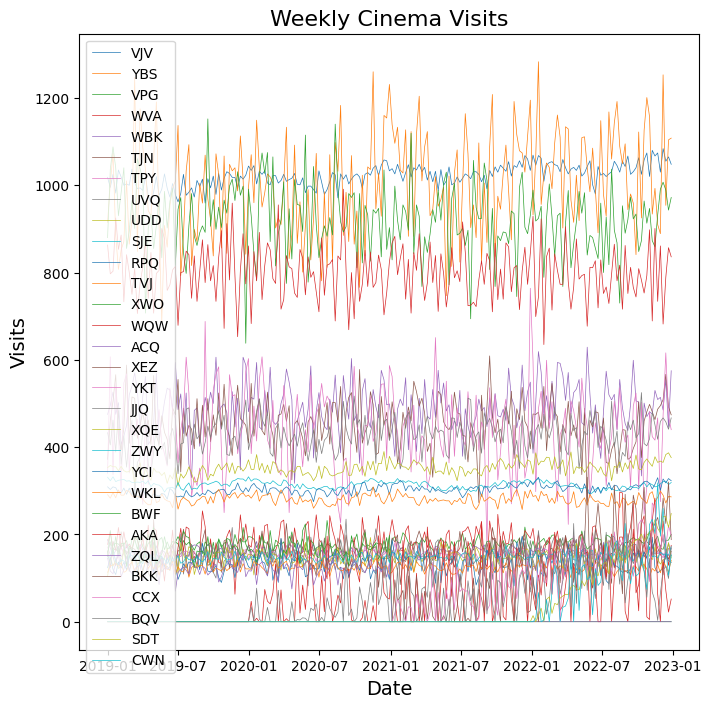

In [6]:
# Line Plot

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

plt.figure(figsize=(8, 8))
plt.plot(data, linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Visits', fontsize=14)
plt.title('Weekly Cinema Visits', fontsize=16)
plt.legend(data.columns, loc=2)
plt.show()


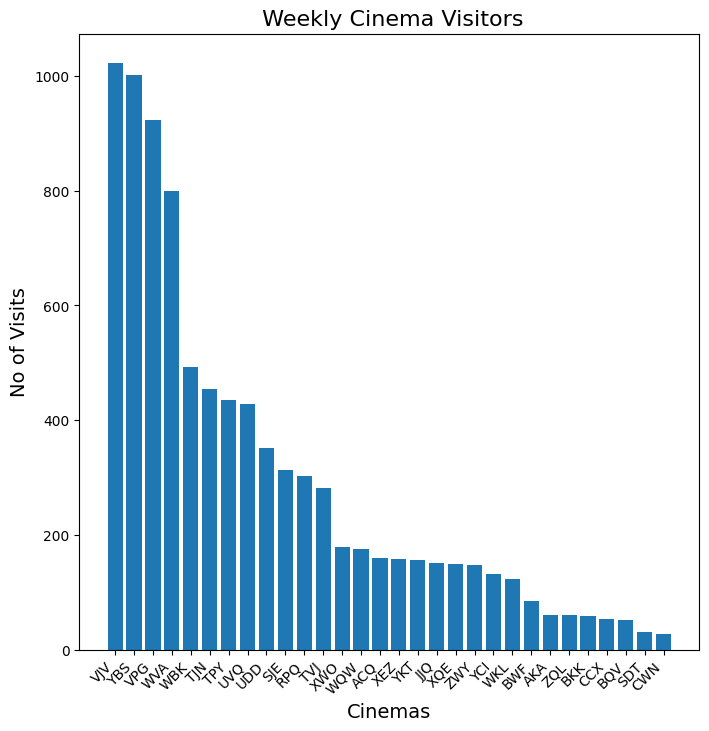

In [12]:
#Bar Chart of all data

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data.columns))
plt.bar(x_pos, data.mean(), align='center')
plt.xticks(x_pos, data.columns)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cinemas', fontsize=14)
plt.ylabel('No of Visits', fontsize=14)
plt.title(' Weekly Cinema Visitors', fontsize=16)
plt.show()

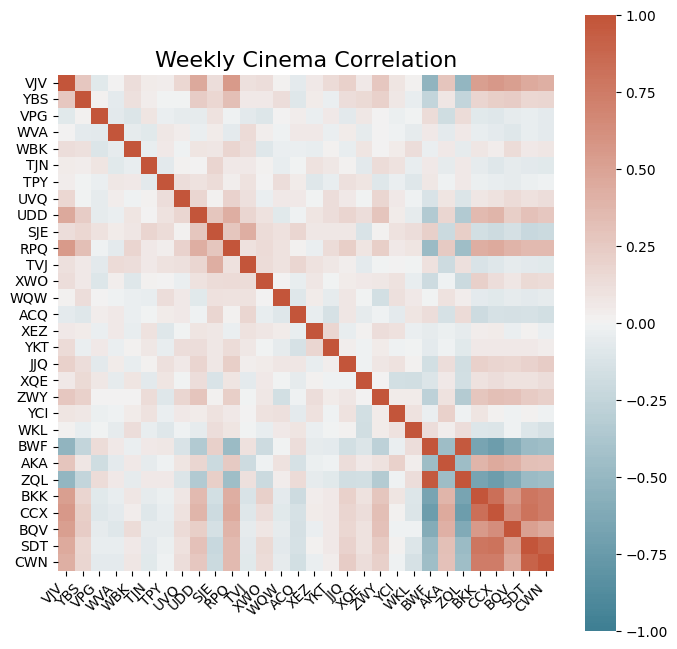

In [16]:
# Heat Map All
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

plt.figure(figsize=(8, 8))
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Weekly Cinema Correlation', fontsize=16)
plt.show()


All Summary Dataset Interactive Heatmap
  Instructions:
   By default hvPlot includes pan, box zoom, wheel zoom, save and reset. Here in addition hover tool is added. These can be seen on the Right top Corner of the plot.
   Click the hover tool and move it on the plot, data of different points can be fetched like these. Using Zoom buttons zoom into area with which is more red to inspect higher correlation. Else, use the Box zoom button and create a box on specific areas to create a new plot of only that area.


/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-p

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
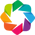

:HeatMap   [columns,index]   (value)

In [40]:

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

pd.plotting.register_matplotlib_converters()

cinema_age = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaAge.csv', index_col=0) # Avg Age of visitors
cinema_capacity = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaCapacity.csv', index_col=0) # Avg Seating capacity
cinema_marketing = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaMarketing.csv', index_col=0) # Avg Spend on Marketing
cinema_overheads = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaOverheads.csv', index_col=0) # Avg Overheads for each cinema
cinema_spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaSpend.csv ', index_col=0) # Avg Spend(£)by visitors


summary_data = pd.DataFrame(index=data.columns)
summary_data['Age'] = cinema_age.values
summary_data['Capacity'] = cinema_capacity.values
summary_data['Visitors'] = data.mean().values
summary_data['Marketing'] = cinema_marketing.values
summary_data['Overheads'] = cinema_overheads.values
summary_data['Spend'] = cinema_spend.values

plot = summary_data.corr().hvplot.heatmap(
    frame_height=500, frame_width=500,
    title='Cinemas Visitors Correlations',
    rot=90, cmap='coolwarm'
).opts(invert_yaxis=True, clim=(-1, 1))
hv.extension('bokeh')
plot


# HIGH VOLUME CINEMAS

**Identifying Outliers, anomalies and seasonality changes using different Data Visualisation Plots**

             VJV   YBS   VPG  WVA
Date                             
2019-01-01  1018   915   880  863
2019-01-08   995  1004  1036  797
2019-01-15  1025  1073  1088  803
2019-01-22   982   885  1040  925
2019-01-29  1035   807   930  853


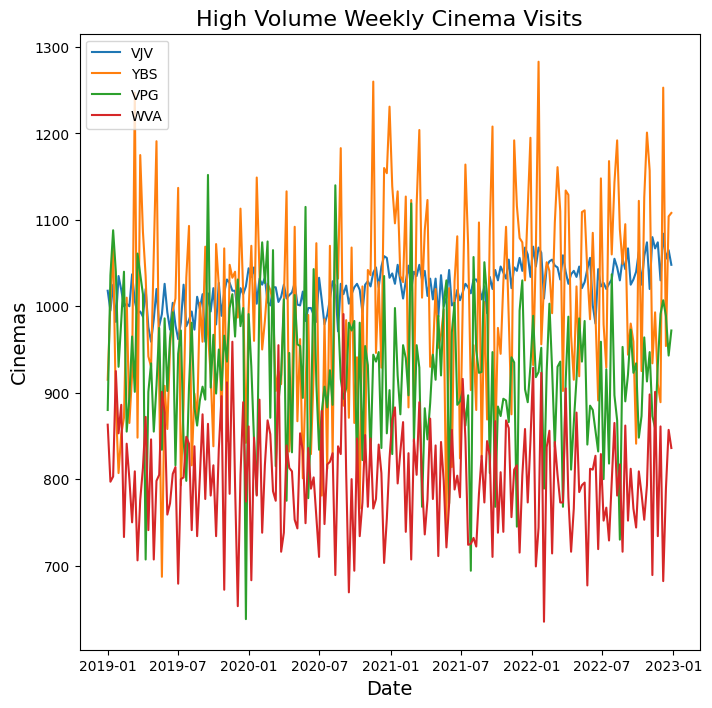

In [8]:
#Line Plot
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)


selected = ['VJV', 'YBS', 'VPG','WVA']
print(data[selected].head())

plt.figure(figsize=(8, 8))
plt.plot(data[selected])
# plt.ylim(ymin=0)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cinemas', fontsize=14)
plt.title('High Volume Weekly Cinema Visits', fontsize=16)
plt.legend(selected, loc=2)
plt.show()

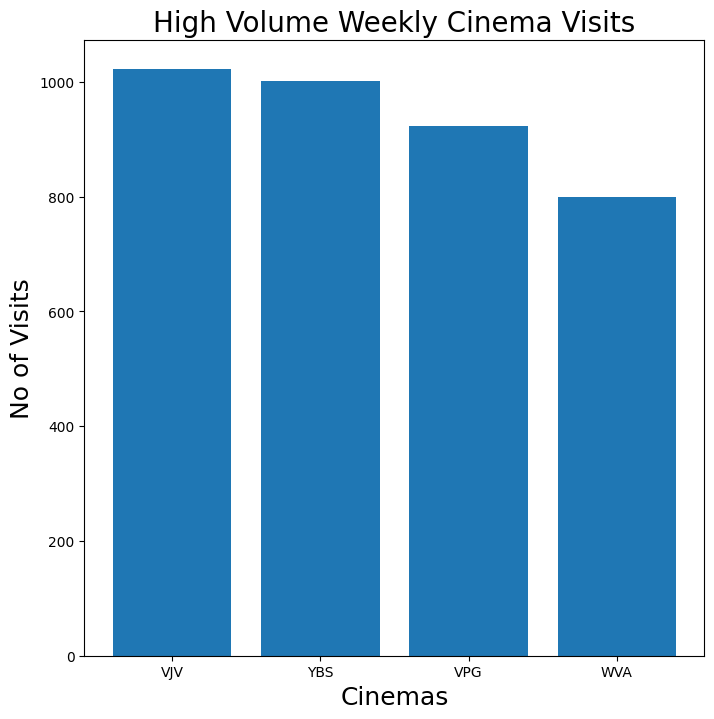

In [13]:
#Bar Plot

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

selected = ['VJV', 'YBS', 'VPG','WVA']

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data[selected].columns))
plt.bar(x_pos, data[selected].mean(), align='center')
plt.xticks(x_pos,data[selected].columns)
plt.xlabel('Cinemas', fontsize=18)
plt.ylabel('No of Visits', fontsize=18)
plt.title('High Volume Weekly Cinema Visits', fontsize=20)
plt.show()

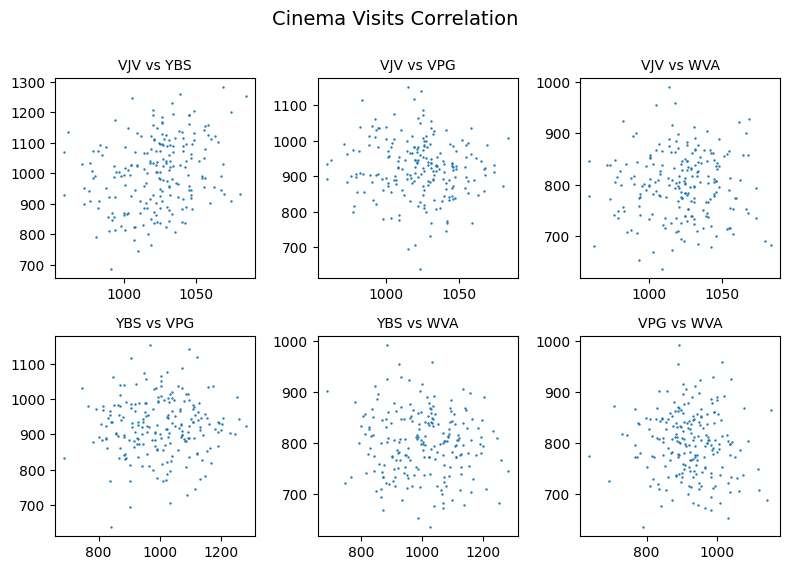

In [20]:
# Scatter Sub Plot

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)
selected = ['VJV', 'YBS', 'VPG','WVA']

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Cinema Visits Correlation', fontsize=14, position=(0.5, 1.0))
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(3, 3, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sub.scatter(data[name_i], data[name_j], s=0.5)
        counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()



32 bins


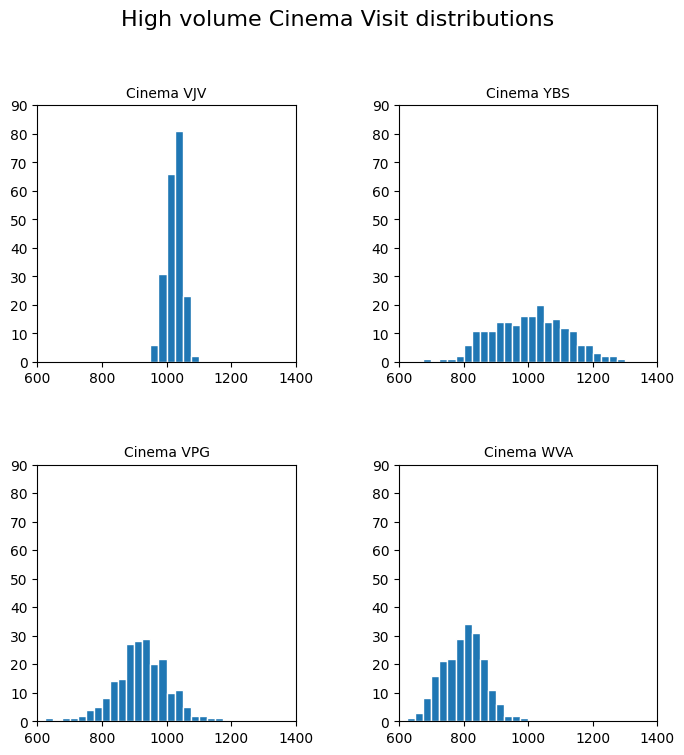

In [22]:
# Histogram
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)
selected = ['VJV', 'YBS', 'VPG','WVA']

x_min = 600
x_max = 1400
bin_width = 25

n_bins = int((x_max - x_min) / bin_width)
print(f'{n_bins} bins')
bins = [(x_min + x * bin_width) for x in range(n_bins + 1)]

fig = plt.figure(figsize=(8, 8))
fig.suptitle('High volume Cinema Visit distributions', fontsize=16, position=(0.5, 1.0))
counter = 1
for name in selected:
    sub = fig.add_subplot(2, 2, counter)
    sub.hist(data[name], bins, edgecolor='w')
    sub.set_title('Cinema ' + name, fontsize=10)
    sub.set_xlim(xmin=x_min, xmax=x_max)
    sub.set_ylim(ymin=0, ymax=90)
    counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()


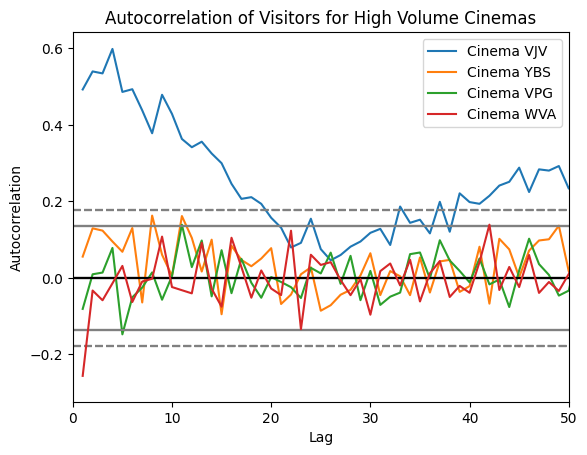

In [27]:
# Autocorrelation Plot

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv', index_col=0)
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

selected = ['VJV', 'YBS', 'VPG', 'WVA']

fig, ax = plt.subplots()
for name in selected:
    pd.plotting.autocorrelation_plot(data[name], ax=ax, label='Cinema ' + name)
ax.set_xlim([0, 50])
plt.title('Autocorrelation of Visitors for High Volume Cinemas')
plt.legend()
plt.show()


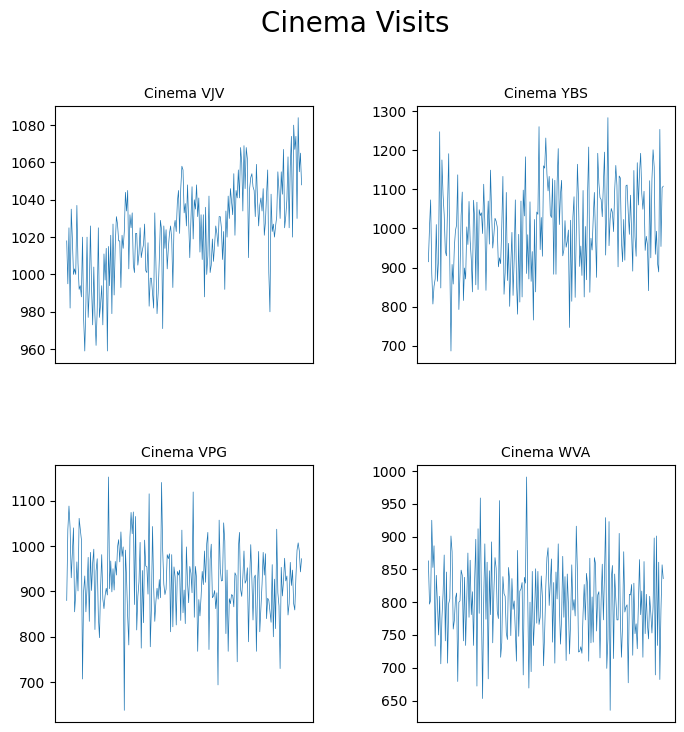

In [25]:
#Line Sub plot
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)
selected = ['VJV', 'YBS', 'VPG','WVA']

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Cinema Visits', fontsize=20, position=(0.5, 1.0))
for name in selected:
    sub = fig.add_subplot(2, 2, counter)
    sub.set_title('Cinema ' + name, fontsize=10)
    sub.plot(data.index, data[name], linewidth=0.5)
    sub.axes.get_xaxis().set_ticks([])  # remove the x ticks
    counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

     Age  Capacity     Visitors  Marketing  Overheads  Spend
VJV   44        30  1022.435407          1         20     13
YBS   40       210  1001.234450          5         83     18
VPG   45       348   922.555024         22         18     27
WVA   40       196   799.210526         23         39     24
WBK   34        51   491.918660          3         15     15
TJN   28        30   454.320574          2         71     16
TPY   35       591   435.732057         24         56     18
UVQ   43       198   428.172249          7         87     20
UDD   41       105   351.598086          2         46     18
SJE   30        47   313.913876          1         77     15


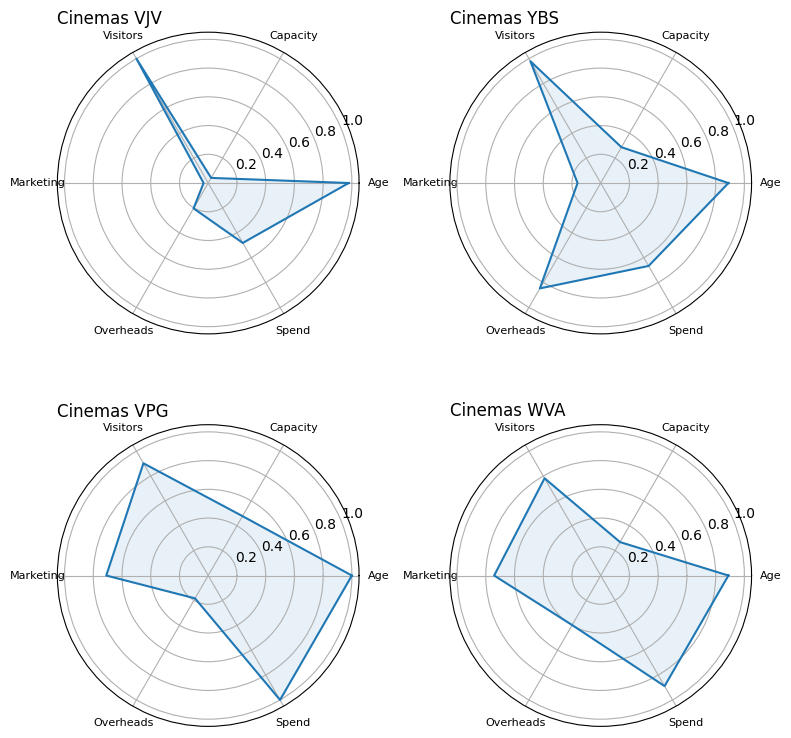

In [29]:
# Radar Plot

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

pd.plotting.register_matplotlib_converters()

cinema_age = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaAge.csv', index_col=0) # Avg Age of visitors
cinema_capacity = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaCapacity.csv', index_col=0) # Avg Seating capacity
cinema_marketing = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaMarketing.csv', index_col=0) # Avg Spend on Marketing
cinema_overheads = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaOverheads.csv', index_col=0) # Avg Overheads for each cinema
cinema_spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaSpend.csv ', index_col=0) # Avg Spend(£)by visitors


summary_data = pd.DataFrame(index=data.columns)
summary_data['Age'] = cinema_age.values
summary_data['Capacity'] = cinema_capacity.values
summary_data['Visitors'] = data.mean().values
summary_data['Marketing'] = cinema_marketing.values
summary_data['Overheads'] = cinema_overheads.values
summary_data['Spend'] = cinema_spend.values
print(summary_data.head(10))
selected = ['VJV', 'YBS', 'VPG','WVA']
normalised_data = summary_data / summary_data.max()


n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(2, 2, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Cinemas ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.show()

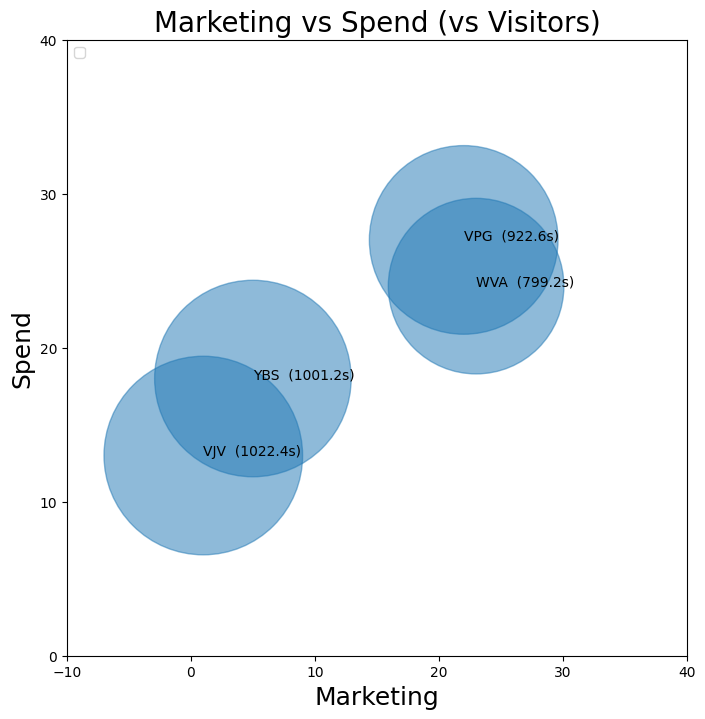

In [35]:
#Bubble Plot
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv', index_col=0)
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

selected = ['VJV', 'YBS', 'VPG', 'WVA']
summary_data = summary_data.loc[selected]


summary_data['BubbleSize'] = summary_data['Visitors'] * 20

plt.figure(figsize=(8, 8))
plt.scatter(summary_data['Marketing'], summary_data['Spend'], s=summary_data['BubbleSize'], alpha=0.5)
plt.xticks([-10, 0, 10, 20, 30, 40])
plt.yticks([0, 10, 20, 30, 40])
plt.title('Marketing vs Spend (vs Visitors)', fontsize=20)
plt.xlabel('Marketing', fontsize=18)
plt.ylabel('Spend', fontsize=18)
for i, name in enumerate(summary_data.index):
    plt.annotate(f"{name}  ({summary_data['Visitors'][i]:.1f}s)", (summary_data['Marketing'][i], summary_data['Spend'][i]))
#plt.plot([0, 50], [0, 50], linestyle=':', color='r', label='price = cost (zero profit)')
plt.legend(loc=2)
plt.show()

# MEDIUM VOLUME CINEMAS

**Identifying Outliers, anomalies and seasonality changes using different Data Visualisation Plots**

            WBK  TJN  TPY  UVQ  UDD  SJE  RPQ  TVJ
Date                                              
2019-01-01  475  372  340  433  353  331  309  291
2019-01-08  496  461  607  405  358  323  303  283
2019-01-15  526  505  337  462  355  332  309  296
2019-01-22  475  566  547  389  355  321  307  284
2019-01-29  502  423  435  484  346  324  296  302


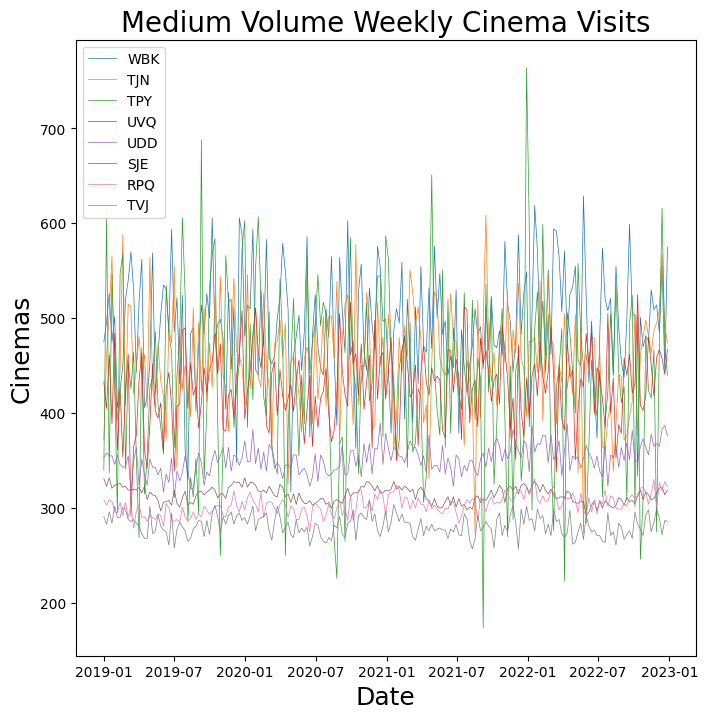

In [9]:
#Line Plot
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

selected = ['WBK', 'TJN', 'TPY', 'UVQ', 'UDD', 'SJE', 'RPQ', 'TVJ']
print(data[selected].head())

# data[selected].plot.line(linewidth=0.5, figsize=(8, 8))
plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Cinemas', fontsize=18)
plt.title('Medium Volume Weekly Cinema Visits', fontsize=20)
plt.legend(selected, loc=2)
plt.show()

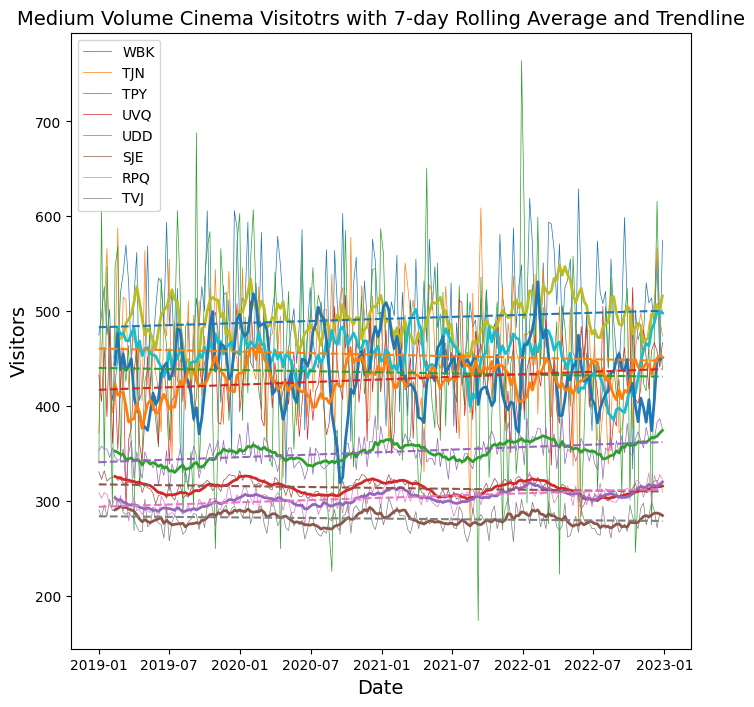

In [10]:
# Line Plot with Rolling average and trendline

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

selected = ['WBK', 'TJN', 'TPY', 'UVQ', 'UDD', 'SJE', 'RPQ', 'TVJ']
period = 7
rolling_average = data.rolling(window=period).mean()

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.plot(rolling_average[selected], linewidth=2)
plt.gca().set_prop_cycle(None)
for name in selected:
    x = np.arange(len(data[name]))
    z = np.polyfit(x, data[name], 1)
    trend = np.poly1d(z)
    plt.plot(data.index, trend(x), linestyle='--')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Visitors', fontsize=14)
plt.title('Medium Volume Cinema Visitotrs with 7-day Rolling Average and Trendline', fontsize=14)
plt.legend(selected, loc=2)
plt.show()

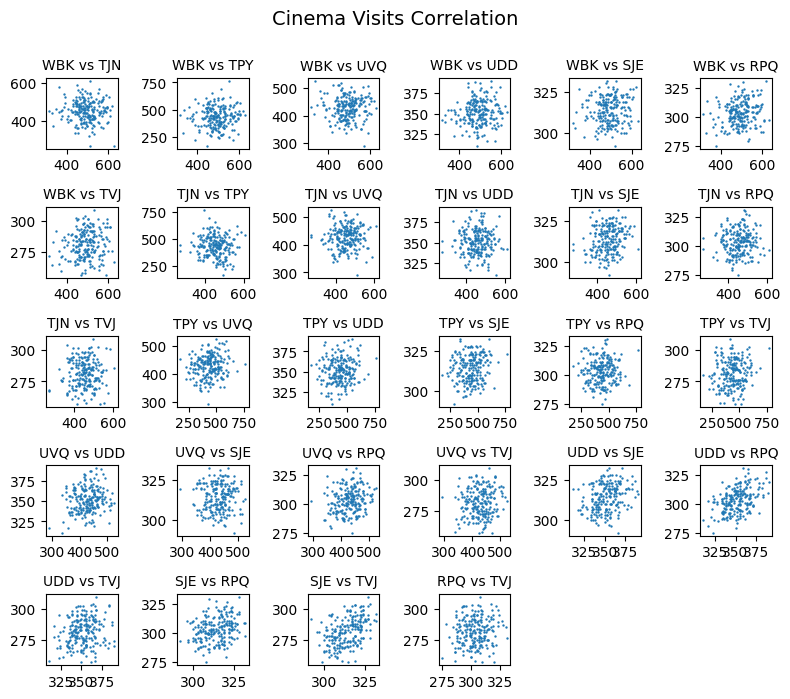

In [21]:
# Scatter Sub Plot

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)
selected = ['WBK', 'TJN', 'TPY', 'UVQ', 'UDD', 'SJE', 'RPQ', 'TVJ']

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Cinema Visits Correlation', fontsize=14, position=(0.5, 1.0))
for i, name_i in enumerate(selected):
    for j in range(i + 1, len(selected)):
        name_j = selected[j]
        sub = fig.add_subplot(6, 6, counter)
        sub.set_title(name_i + ' vs ' + name_j, fontsize=10)
        sub.scatter(data[name_i], data[name_j], s=0.5)
        counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

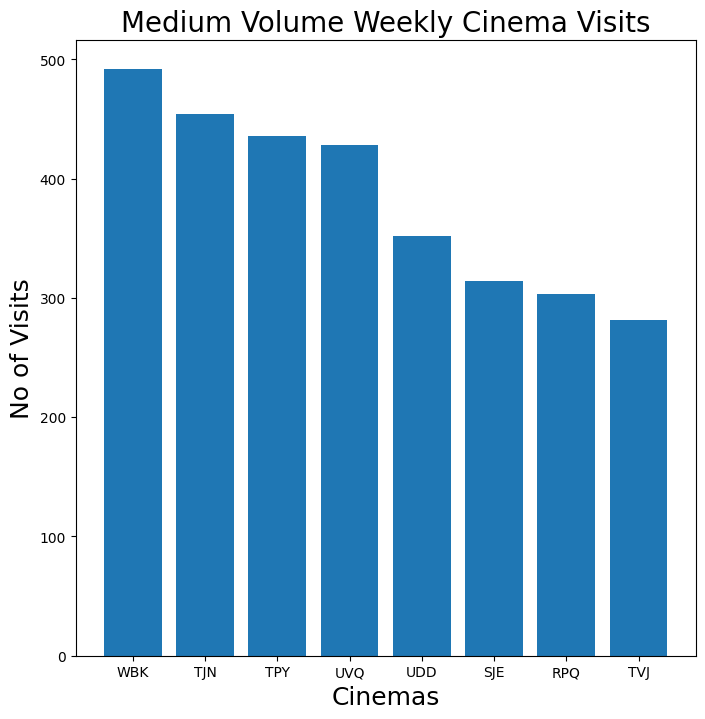

In [14]:
# Bar Plot

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)


selected =  ['WBK', 'TJN', 'TPY', 'UVQ', 'UDD', 'SJE', 'RPQ', 'TVJ']
plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data[selected].columns))
plt.bar(x_pos, data[selected].mean(), align='center')
plt.xticks(x_pos,data[selected].columns)
plt.xlabel('Cinemas', fontsize=18)
plt.ylabel('No of Visits', fontsize=18)
plt.title('Medium Volume Weekly Cinema Visits', fontsize=20)
plt.show()

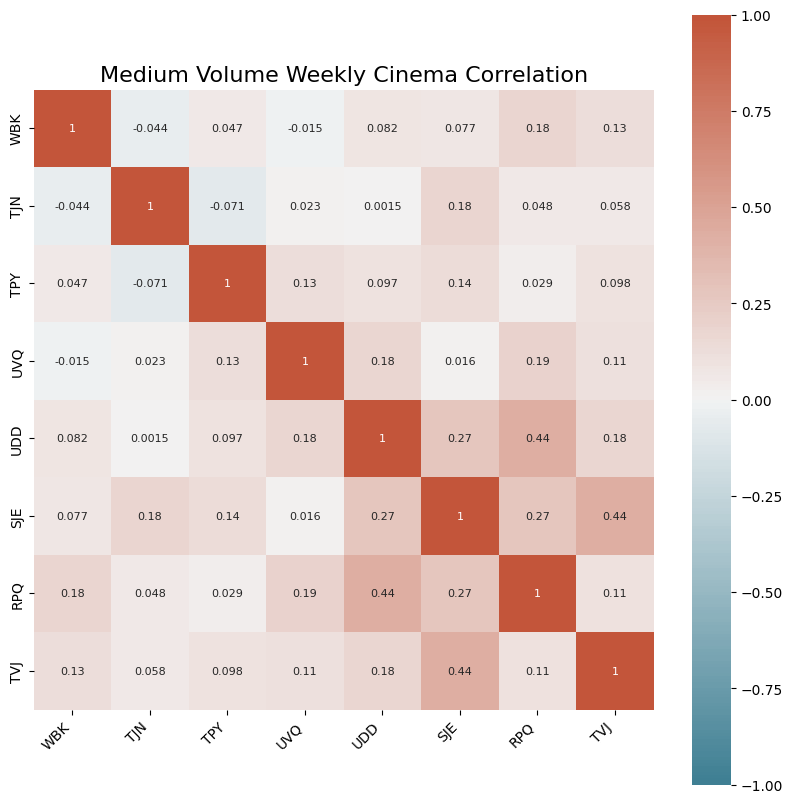

In [18]:
# HeatMap
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)
selected = ['WBK', 'TJN', 'TPY', 'UVQ', 'UDD', 'SJE', 'RPQ', 'TVJ']

plt.figure(figsize=(10, 10))
corr = data[selected].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Medium Volume Weekly Cinema Correlation', fontsize=16)
plt.show()

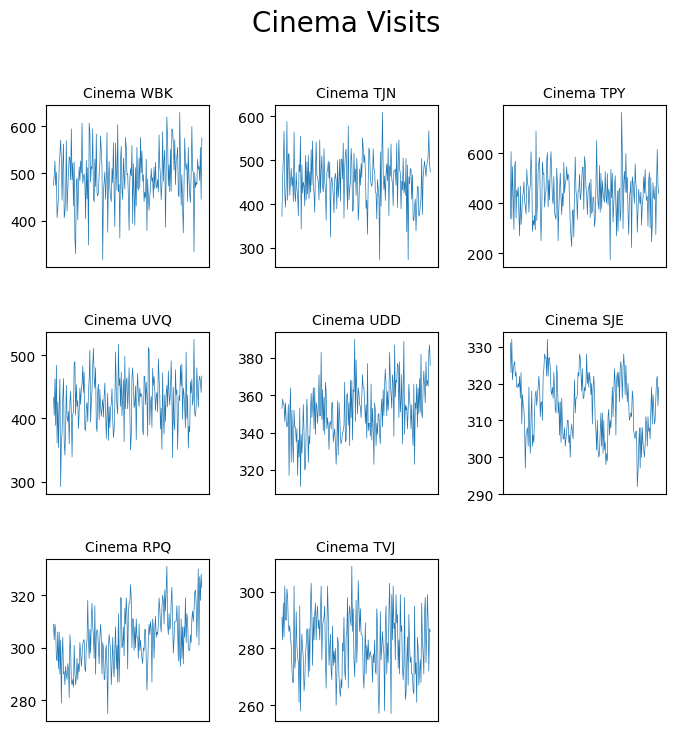

In [24]:
#Line Sub Plot
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)
selected = ['WBK', 'TJN', 'TPY', 'UVQ', 'UDD', 'SJE', 'RPQ', 'TVJ']

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Cinema Visits', fontsize=20, position=(0.5, 1.0))
for name in selected:
    sub = fig.add_subplot(3, 3, counter)
    sub.set_title('Cinema ' + name, fontsize=10)
    sub.plot(data.index, data[name], linewidth=0.5)
    sub.axes.get_xaxis().set_ticks([])  # remove the x ticks
    counter += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

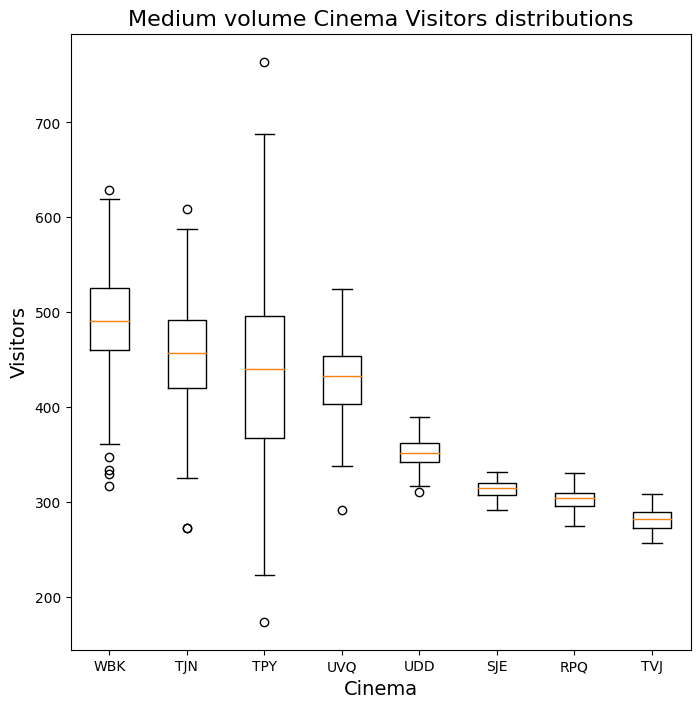

In [36]:
#Box Plot
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)
selected = ['WBK', 'TJN', 'TPY', 'UVQ', 'UDD', 'SJE', 'RPQ', 'TVJ']

plt.figure(figsize=(8, 8))
plt.boxplot(data[selected], labels=selected)
plt.xlabel('Cinema', fontsize=14)
plt.ylabel('Visitors', fontsize=14)
plt.title('Medium volume Cinema Visitors distributions', fontsize=16)
plt.show()


     Spend  Marketing     Visitors  Age  Overheads  Capacity
VJV     13          1  1022.435407   44         20        30
YBS     18          5  1001.234450   40         83       210
VPG     27         22   922.555024   45         18       348
WVA     24         23   799.210526   40         39       196
WBK     15          3   491.918660   34         15        51
TJN     16          2   454.320574   28         71        30
TPY     18         24   435.732057   35         56       591
UVQ     20          7   428.172249   43         87       198
UDD     18          2   351.598086   41         46       105
SJE     15          1   313.913876   30         77        47


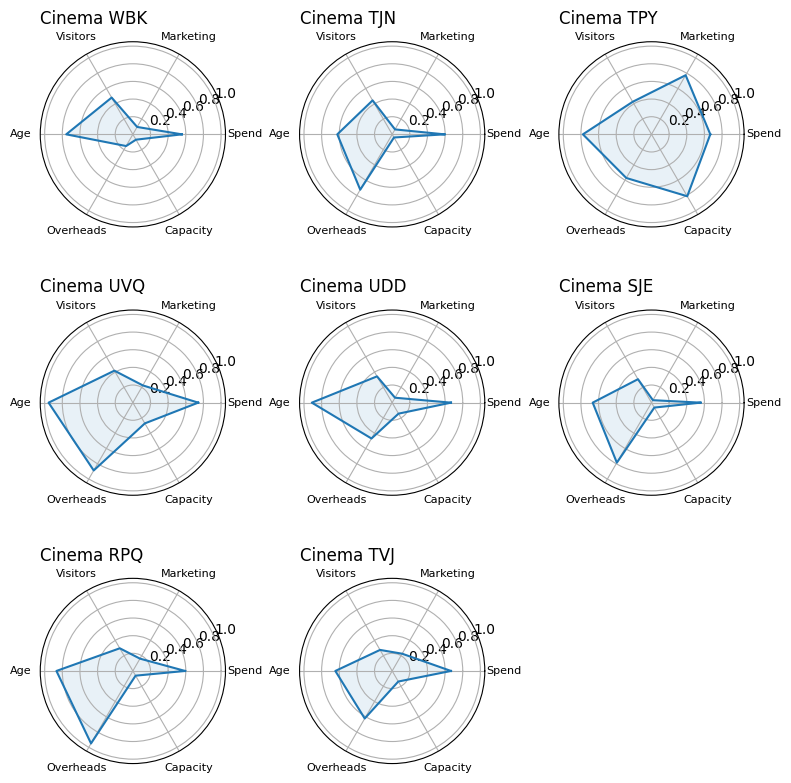

In [34]:
# Radar Plot

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

pd.plotting.register_matplotlib_converters()

cinema_age = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaAge.csv', index_col=0) # Avg Age of visitors
cinema_capacity = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaCapacity.csv', index_col=0) # Avg Seating capacity
cinema_marketing = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaMarketing.csv', index_col=0) # Avg Spend on Marketing
cinema_overheads = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaOverheads.csv', index_col=0) # Avg Overheads for each cinema
cinema_spend = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaSpend.csv ', index_col=0) # Avg Spend(£)by visitors


summary_data = pd.DataFrame(index=data.columns)
summary_data['Spend'] = cinema_spend.values

summary_data['Marketing'] = cinema_marketing.values

summary_data['Visitors'] = data.mean().values
summary_data['Age'] = cinema_age.values
summary_data['Overheads'] = cinema_overheads.values
summary_data['Capacity'] = cinema_capacity.values
print(summary_data.head(10))
selected = ['WBK', 'TJN', 'TPY', 'UVQ', 'UDD', 'SJE', 'RPQ', 'TVJ']
normalised_data = summary_data / summary_data.max()


n_attributes = len(normalised_data.columns)
angles = [n / float(n_attributes) * 2 * np.pi for n in range(n_attributes + 1)]
plt.figure(figsize=(8, 8))
counter = 1
for name in selected:
    values = normalised_data.loc[[name]].values.flatten().tolist()
    values += values[:1]
    sub = plt.subplot(3, 3, counter, polar=True)
    sub.plot(angles, values)
    sub.fill(angles, values, alpha=0.1)
    sub.set_ylim(ymax=1.05)
    sub.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    sub.set_xticks(angles[0:-1])
    sub.set_xticklabels(normalised_data.columns, fontsize=8)
    sub.set_title('Cinema ' + name, fontsize=12, loc='left')
    counter += 1
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

# LOW VOLUME CINEMAS

**Identifying Outliers, anomalies and seasonality changes using different Data Visualisation Plots**

            XWO  WQW  ACQ  XEZ  YKT  JJQ  XQE  ZWY  YCI  WKL  BWF  AKA  ZQL  \
Date                                                                          
2019-01-01  188  177  187  162  171  159  104  145  124  113  149    0  146   
2019-01-08  176  206  169  124  153  183  148  150  147  128  209    0  116   
2019-01-15  175  168  152  184  154  149  127  167  120  130  153    0  110   
2019-01-22  180  164  163  166  141  128  141  138  108  134  195    0  135   
2019-01-29  178  216  173  160  150  170  122  130  137  127  152    0  157   

            BKK  CCX  BQV  SDT  CWN  
Date                                 
2019-01-01    0    0    0    0    0  
2019-01-08    0    0    0    0    0  
2019-01-15    0    0    0    0    0  
2019-01-22    0    0    0    0    0  
2019-01-29    0    0    0    0    0  


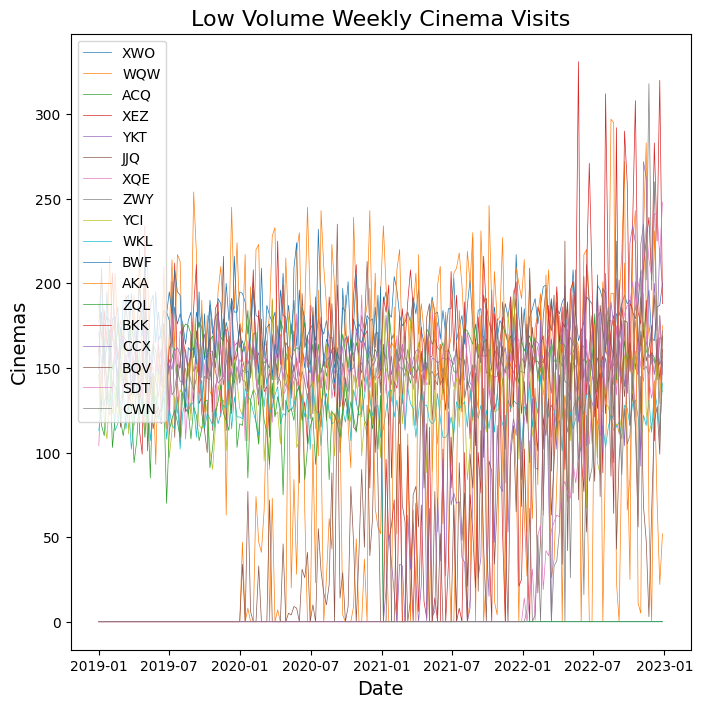

In [11]:
#Line Plot

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0)
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

selected =  ['XWO', 'WQW', 'ACQ', 'XEZ', 'YKT', 'JJQ', 'XQE', 'ZWY', 'YCI', 'WKL', 'BWF', 'AKA', 'ZQL', 'BKK', 'CCX', 'BQV', 'SDT', 'CWN' ]

print(data[selected].head())

# data[selected].plot.line(linewidth=0.5, figsize=(8, 8))
plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cinemas', fontsize=14)
plt.title('Low Volume Weekly Cinema Visits', fontsize=16)
plt.legend(selected, loc=2)
plt.show()

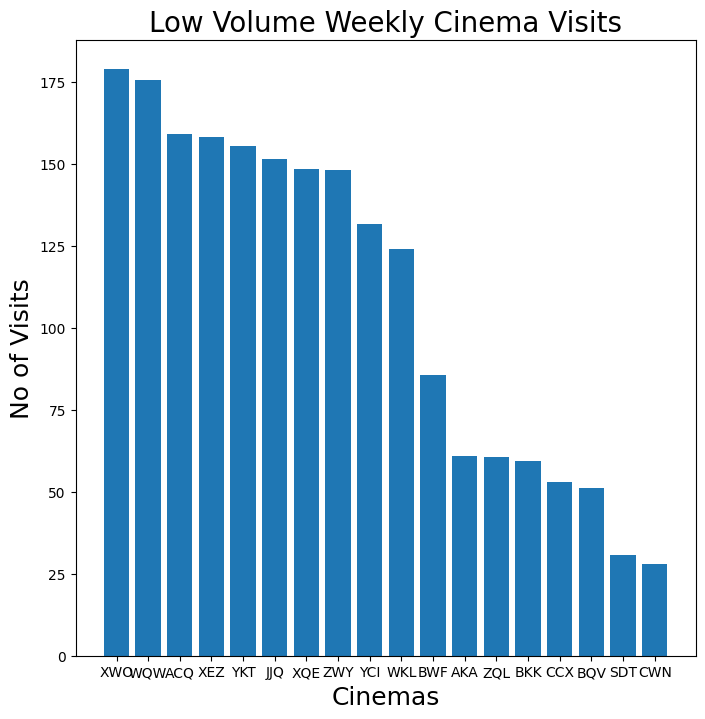

In [15]:
#Bar Plot

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)
selected =  ['XWO', 'WQW', 'ACQ', 'XEZ', 'YKT', 'JJQ', 'XQE', 'ZWY', 'YCI', 'WKL', 'BWF', 'AKA', 'ZQL', 'BKK', 'CCX', 'BQV', 'SDT', 'CWN' ]

plt.figure(figsize=(8, 8))
x_pos = np.arange(len(data[selected].columns))
plt.bar(x_pos, data[selected].mean(), align='center')
plt.xticks(x_pos,data[selected].columns)
plt.xlabel('Cinemas', fontsize=18)
plt.ylabel('No of Visits', fontsize=18)
plt.title('Low Volume Weekly Cinema Visits', fontsize=20)
plt.show()

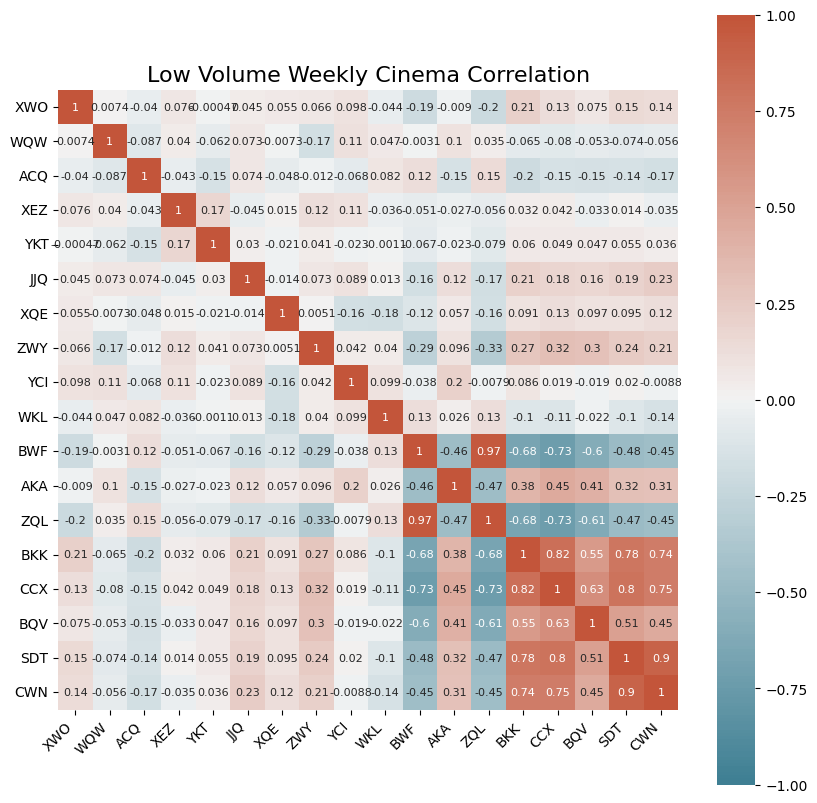

In [19]:
#Heatmap
]data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)
selected =  ['XWO', 'WQW', 'ACQ', 'XEZ', 'YKT', 'JJQ', 'XQE', 'ZWY', 'YCI', 'WKL', 'BWF', 'AKA', 'ZQL', 'BKK', 'CCX', 'BQV', 'SDT', 'CWN' ]

plt.figure(figsize=(10, 10))
corr = data[selected].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Low Volume Weekly Cinema Correlation', fontsize=16)
plt.show()

Low Volume Interactive LinePlot Instructions: By default hvPlot includes pan, box zoom, wheel zoom, save and reset. Here in addition hover tool is added. These can be seen on the Right top Corner of the plot. Click the hover tool and move it on the plot, data of different points can be fetched like these. Using Zoom buttons zoom into area with which is more red to inspect higher correlation. Else, use the Box zoom button and create a box on specific areas to create a new plot of only that area. Create a box over the line where it touches zero and use hover tools (Opening and closing of cinemas can be observed).

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
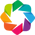

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [41]:
#Interactive Line Plot

data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

selected =  ['XWO', 'WQW', 'ACQ', 'XEZ', 'YKT', 'JJQ', 'XQE', 'ZWY', 'YCI', 'WKL', 'BWF', 'AKA', 'ZQL', 'BKK', 'CCX', 'BQV', 'SDT', 'CWN' ]

plot = data[selected].hvplot.line(
    frame_height=500, frame_width=500,
    xlabel='Date', ylabel='Visitors',
    title='Low Volume Products'
)
hv.extension('bokeh')
plot


Low Volume Cinemas Interactive Heatmap Instructions: By default hvPlot includes pan, box zoom, wheel zoom, save and reset. Here in addition hover tool is added. These can be seen on the Right top Corner of the plot. Click the hover tool and move it on the plot, data of different points can be fetched like these. Using Zoom buttons zoom into area with which is more red to inspect higher correlation. Else, use the Box zoom button and create a box on specific areas to create a new plot of only that area.

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning: 'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.
  value = param_value_if_widget(value)
/usr/local/lib/python3.10/dist-p

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
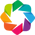

:HeatMap   [columns,index]   (value)

In [39]:
# Interactive Heatmap
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/001325264/CinemaWeeklyVisitors.csv',index_col=0) #Weekly no of customer visits
data.index = pd.to_datetime(data.index)
data = data.reindex(data.mean().sort_values(ascending=False).index, axis=1)

selected =  ['XWO', 'WQW', 'ACQ', 'XEZ', 'YKT', 'JJQ', 'XQE', 'ZWY', 'YCI', 'WKL', 'BWF', 'AKA', 'ZQL', 'BKK', 'CCX', 'BQV', 'SDT', 'CWN' ]

plot = data[selected].corr().hvplot.heatmap(
    frame_height=500, frame_width=500,
    title='Page correlations',
    rot=90, cmap='coolwarm'
).opts(invert_yaxis=True, clim=(-1, 1))
hv.extension('bokeh')
plot
